# User Input

In [1]:
index_fit=3 #ending index of data to use for fitting (so if index_fit=10 use datapoints 0 to 10)

# Defining functions and importing data

In [3]:
#imports
import pandas
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astropy.io import ascii

In [3]:
df= pandas.read_csv("bol1.csv") #read in the data
df = df.dropna() #drop the nan entries

#organize data into lists
data_t = df['t0'].tolist()[:index_fit]
data_lum = df['mag_abs'].tolist()[:index_fit]

#define a power law function
def power_law(x, offset_y,offset_x, amp, index):
    return offset_y + amp*((x+offset_x)**index)

#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
#popt, pcov = curve_fit(power_law, data_t, data_lum, p0 = np.asarray([6E43,5,-1E40,2]))
popt, pcov = curve_fit(power_law, data_t, data_lum, p0 = np.asarray([-21,5,-10,2]))

#extrapolate to earlier times
model_t = np.linspace(-80,5, dtype=np.complex)
model_lum = power_law(model_t, *popt)
popt

TypeError: Improper input: N=4 must not exceed M=3

# Plotting

/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


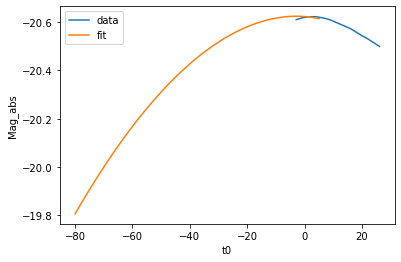

In [8]:
#Plot the data and the extrapolated model
plt.figure()
#plt.ylabel('Luminosity')
plt.ylabel('Mag_abs')
plt.xlabel("t0")
plt.plot(data_t,data_lum,label='data')
plt.plot(model_t,model_lum,  label='fit')
plt.gca().invert_yaxis()
plt.legend()

In [4]:
df= pandas.read_csv("grizps11aop.csv") #read in the data
df = df.dropna() #drop the nan entries
index_fit=3 
amp = 1
#organize data into lists
data_t = df['phasei'].tolist()[:index_fit]
data_lum = 10**(-0.4*df['mag_absi'])
data_f = data_lum.tolist()[:index_fit]

#define a power law function
def power_law(x, a, b):
    return a*np.power(x, b)


#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0=[38212206, 0.9], bounds=(-np.inf, np.inf))

#extrapolate to earlier times
model_t = np.linspace(-5,5, dtype=np.complex)
model_f = power_law(model_t, *pars)
pars

<ipython-input-4-72e53a7aa56a>:12: RuntimeWarning: invalid value encountered in power
  return a*np.power(x, b)
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([3.8212206e+07, 9.0000000e-01])

In [5]:
#organize data into lists
#data_t = [-4.63106, -2.168, 2.75811]
#data_f = [171028623.35060817, 181634858.53356943, 189010878.21146134]
data_t = df['phasei'].tolist()[:index_fit]
data_lum = 10**(-0.4*df['mag_absi'])
data_f = data_lum.tolist()[:index_fit]

#define a power law function F = F0(t-t0)^alpha
def power_law(t,F0,t0,alpha):
    return F0*(t-t0)**alpha
#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -10, 0.1])
#extrapolate to earlier times
model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex)
model_f = power_law(model_t, *pars)
pars

<ipython-input-5-fefb2e821a1a>:10: RuntimeWarning: invalid value encountered in power
  return F0*(t-t0)**alpha


array([ 1.72481953e+08, -5.45414365e+00,  4.34606619e-02])

/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

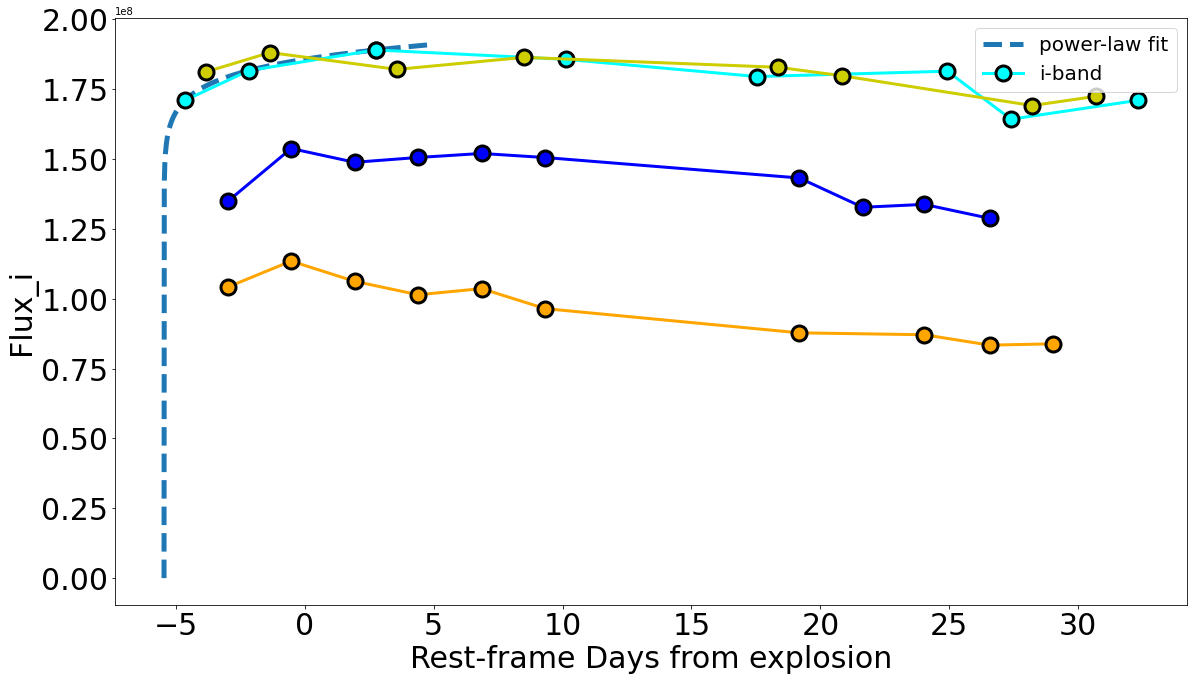

In [6]:
#Plot the data and the extrapolated model
plt.figure()
fig,ax = plt.subplots(figsize=(19.20,10.80))
plt.ylabel('Flux_i',fontsize =30)
plt.xlabel('Rest-frame Days from explosion',fontsize =30)
#plt.plot(data_t,data_f,label='data')
#plt.plot(model_t,model_f,  label='fit')
#plt.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--',label = 'g-max')
plt.errorbar(data_t,data_f,marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3,label='i-band')
plt.plot(model_t,model_f,linewidth = 5, linestyle = '--', label='power-law fit')
plt.errorbar(df['phasei'][2:8],data_lum[2:8],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phaser'][:10],10**(-0.4*df['mag_absr'])[:10],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phaseg'][:10],10**(-0.4*df['mag_absg'])[:10],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phasez'][:8],10**(-0.4*df['mag_absz'])[:8],marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)

#plt.gca().invert_yaxis()
plt.tick_params(labelsize=30) 
plt.legend(fontsize =20)
#plt.ylim(-15.5,-22.5)

In [7]:
#organize data into lists
#data_t = [-4.63106, -2.168, 2.75811]
#data_f = [171028623.35060817, 181634858.53356943, 189010878.21146134]
data_t = df['phasei'].tolist()[:index_fit]
data_lum = df['mag_absi']
data_f = data_lum.tolist()[:index_fit]

#define a power law function F = F0(t-t0)^alpha
def power_law(t,F0,t0,alpha):
    return F0*(t-t0)**alpha
#fit data to the powerlaw (I got the initial guesses for the paramaters from trial and error)
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -10, 0.1])
pars, cov = curve_fit(f=power_law, xdata=data_t, ydata=data_f, p0 =[1.7E8, -10, 0.1])

#extrapolate to earlier times
model_t = np.linspace(pars[1],5, num = 1000,dtype=np.complex)
model_f = power_law(model_t, *pars)
pars

<ipython-input-7-b3e8ebde923c>:10: RuntimeWarning: invalid value encountered in power
  return F0*(t-t0)**alpha
/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


array([-2.05921394e+01, -5.44842676e+00,  2.28030765e-03])

/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-19.0, -22.0)

<Figure size 432x288 with 0 Axes>

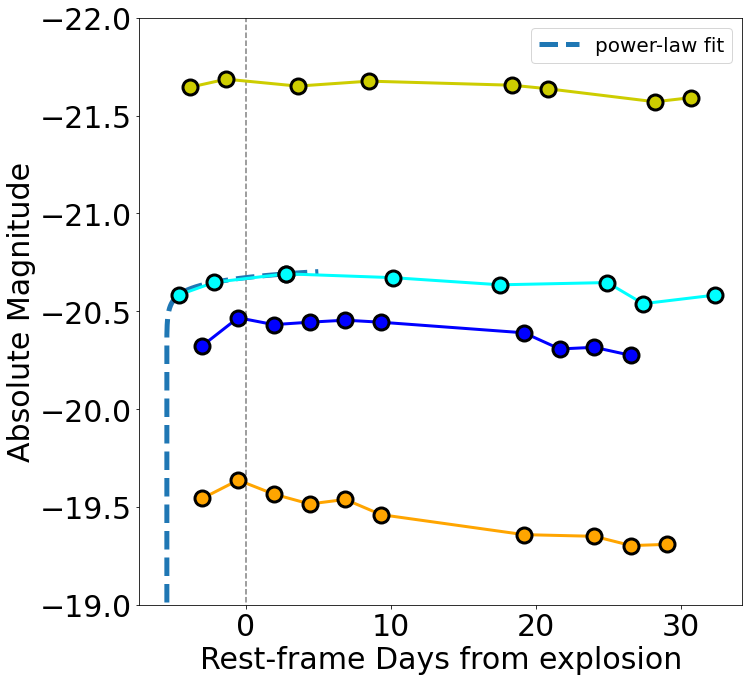

In [8]:
#Plot the data and the extrapolated model
plt.figure()
fig,ax = plt.subplots(figsize=(10.80,10.80))
#plt.ylabel('Flux_i',fontsize =30)
plt.xlabel('Rest-frame Days from explosion',fontsize =30)
#plt.plot(data_t,data_f,label='data')
#plt.plot(model_t,model_f,  label='fit')
plt.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--')
plt.errorbar(data_t,data_f,marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.plot(model_t,model_f,linewidth = 5, linestyle = '--', label='power-law fit')
plt.errorbar(df['phasei'][2:8],data_lum[2:8],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phaser'][:10],df['mag_absr'][:10],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phaseg'][:10],df['mag_absg'][:10]+0.5,marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.errorbar(df['phasez'][:8],df['mag_absz'][:8]-1,marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
plt.ylabel(r'Absolute Magnitude',fontsize=30)
plt.gca().invert_yaxis()
plt.tick_params(labelsize=30) 
plt.legend(fontsize =20)
plt.ylim(-19,-22)

/Users/adaezeibik/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-15.5, -22.5)

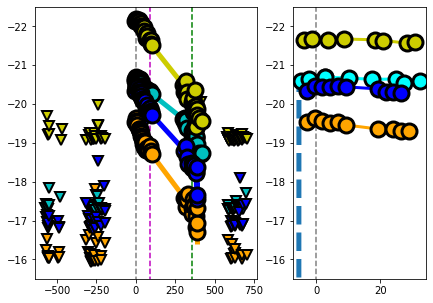

In [42]:
from astropy.io import ascii
from matplotlib import gridspec


fig = plt.figure(figsize=(7, 5)) # 7 inches wide, 5 inches tall
#row = int(fig.get_figheight() * 10)
#col = int(fig.get_figwidth() * 10)
widths = [100, 60]
heights = [20]
grid = gridspec.GridSpec(ncols=2, nrows=1, width_ratios=widths,height_ratios=heights)
                         

#grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3,width_ratios=widths,height_ratios=heights)
                         
ax1 = plt.subplot(grid[0, :1])
ax2 = plt.subplot(grid[0, 1:])

#ax1 = plt.figure()
#ax1.set_figheight(5)
#ax1.set_figwidth(10)

#ax2 = plt.figure()
#ax2.set_figheight(5)
#ax2.set_figwidth(5)

#ax1.plot([2,3,4],[4,7,9])
#fig,ax = plt.subplots(figsize=(19.20,10.80))
file1='grizps11aop.csv'
data1 = ascii.read(file1,format='csv')
#t = data1['t0']
#magabs = data1['mag_abs']
#magerror =  data1['dmag']
#yerr =  magerror

#detections
tg = data1['phaseg']
amg = data1['mag_absg']
amge = data1['dmag_absg']
ti = data1['phasei']
ami = data1['mag_absi']
amie = data1['dmag_absi']
tr = data1['phaser']
amr = data1['mag_absr']
amre = data1['dmag_absr']
tz = data1['phasez']
amz = data1['mag_absz']
amze = data1['dmag_absz']

#upper limits
tuz = data1['time_lz']
amuz = data1['mag_abslz']

tur = data1['time_lr']
amur = data1['mag_abslr']

tui = data1['time_li']
amui = data1['mag_absli']

tug = data1['time_lg']
amug = data1['mag_abslg']


#plt.errorbar(t,magabs,yerr=magerror,fmt = 'k',marker= '+',markersize =10, label = 'Bol LC',linewidth = 5)
#plt.plot(t,magabs,color = 'k',linewidth = 5)

ax1.errorbar(tg[:42],amg[:42]+0.5,yerr=amge[:42],marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'g+0.5',linewidth = 5)
ax1.errorbar(ti[:42],ami[:42],yerr=amie[:42], marker ='o', color = 'c',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'i',linewidth = 5)
ax1.errorbar(tr[:42],amr[:42],yerr=amre[:42],marker ='o', color = 'b',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'r',linewidth = 5)
ax1.errorbar(tz[:46],amz[:46]-1.5,yerr=amze[:46],marker ='o', color = '#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15, label = 'z-1.5',linewidth = 5)

#upper limit
ax1.plot(tug,amug+0.5,marker= 'v',color ='orange',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tui,amui,marker= 'v',color ='c',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tur,amur,marker= 'v',color ='b',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)
ax1.plot(tuz,amuz-1.5,marker= 'v',color ='#CDCD00',markeredgecolor='black',linestyle ='', markeredgewidth=2,markersize =10)

#plt.plot(0,-19, 'gd',markersize =20, label = 'g-max' )
#plt.plot(90.4400000000023,-19, 'md',markersize =20, label = '1st S-90d' )
#plt.plot(357.440000000002,-20,'rd',markersize =20, label = '2nd S-357d' )
#plt.axvline(x=0, ymin= -20.5, ymax= -17.0,color = 'gray',linestyle = '--')
ax1.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--',label = 'g-max')
ax1.plot([90.4400000000023,90.4400000000023],[-15,-22.5],color = 'm',linestyle = '--',label = '1st S-90d')
ax1.plot([357.440000000002,357.440000000002],[-15,-22.5],color = 'g',linestyle = '--',label = '2nd S-357d')
ax1.set_ylim(-15.5,-22.5)
#ax1.set_xlabel('Rest-frame Days from explosion',fontsize =30)
#ax1.set_ylabel(r'Absolute Magnitude',fontsize=30)
#plt.tick_params(labelsize=30)
#plt.legend(fontsize =20)

#ax2.plot([2,3,4],[4,7,9])
ax2.plot([0,0],[-15,-22.5],color = 'gray',linestyle = '--')
ax2.errorbar(data_t,data_f,marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.plot(model_t,model_f,linewidth = 5, linestyle = '--', label='power-law fit')
ax2.errorbar(df['phasei'][2:8],data_lum[2:8],marker= 'o',color ='cyan',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phaser'][:10],df['mag_absr'][:10],marker= 'o',color ='blue',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phaseg'][:10],df['mag_absg'][:10]+0.5,marker= 'o',color ='orange',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
ax2.errorbar(df['phasez'][:8],df['mag_absz'][:8]-1,marker= 'o',color ='#CDCD00',markeredgecolor='black', markeredgewidth=3,markersize =15,linewidth = 3)
#plt.ylabel(r'Absolute Magnitude',fontsize=30)
ax2.set_ylim(-15.5,-22.5)
#plt.gca().invert_yaxis()
#plt.tick_params(labelsize=30) 
#plt.legend(fontsize = 20)